# AIAP 14 Assessment

## Exploratory Data Analysis

### Import modules

In [93]:
import sqlite3
import pandas as pd
import seaborn as sns

### Import dataset

In [94]:
conn = sqlite3.connect("./fishing.db")
fishing_df = pd.read_sql_query("SELECT * FROM fishing", conn)
pd.set_option('display.max_columns', None)
fishing_df.head()

,Date,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,ColourOfBoats,AverageTemp
0,2009-03-08,Changi,0.0,7.0,11.2,E,35.0,E,ESE,15.0,19.0,60.0,54.0,MED,Med,4.0,5.0,No,No,blue,33.4
1,2014-11-12,Woodlands,0.0,8.4,9.6,WNW,37.0,NNE,NW,13.0,28.0,60.0,56.0,MeD,LOw,1.0,2.0,None,Yes,blue,35.4
2,2008-08-08,Woodlands,0.0,7.6,11.1,ESE,52.0,SE,E,19.0,19.0,NaN,13.0,Med,MEd,0.0,0.0,None,No,blue,32.8
3,2015-10-12,Changi,0.0,7.2,11.4,NE,31.0,NNW,NE,9.0,13.0,51.0,53.0,hIgh,med,1.0,1.0,No,No,red,31.4
4,2013-10-27,Woodlands,5.6,7.0,8.5,NNW,33.0,N,N,13.0,19.0,68.0,64.0,meD,MeD,6.0,5.0,None,No,grey,35.4


Some observations:
1. There are missing values
2. Inconsistent casing in pressure columns
3. Most frequent colour of boat spotted is probably not useful for the prediction
4. "No" and "None" in RainToday column

### Initial exploration

Let's take a look at general information regarding the dataset

In [95]:
fishing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12997 entries, 0 to 12996
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12997 non-null  object 
 1   Location       12997 non-null  object 
 2   Rainfall       12997 non-null  float64
 3   Evaporation    12917 non-null  float64
 4   Sunshine       12939 non-null  float64
 5   WindGustDir    12913 non-null  object 
 6   WindGustSpeed  12917 non-null  float64
 7   WindDir9am     12697 non-null  object 
 8   WindDir3pm     12945 non-null  object 
 9   WindSpeed9am   12992 non-null  float64
 10  WindSpeed3pm   12991 non-null  float64
 11  Humidity9am    12983 non-null  float64
 12  Humidity3pm    12970 non-null  float64
 13  Pressure9am    12995 non-null  object 
 14  Pressure3pm    12989 non-null  object 
 15  Cloud9am       12693 non-null  float64
 16  Cloud3pm       12615 non-null  float64
 17  RainToday      9799 non-null   object 
 18  RainTo

Couple of observations:
1. Total number of observations = 12997
2. There are missing data for many columns

Let's take a look at numerical variables

In [96]:
fishing_df.describe()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,AverageTemp
count,12997.000000,12917.000000,12939.000000,12917.000000,12992.000000,12991.000000,12983.000000,12970.000000,12693.000000,12615.000000,12988.000000
mean,3.040532,5.551955,6.496236,36.640164,12.456974,16.703102,65.476623,50.818813,4.108879,4.124138,31.522144
std,10.958255,2.898708,6.026236,12.628845,8.341814,7.882508,15.460822,16.865362,2.727825,2.646195,2.960591
min,0.000000,0.000000,-13.500000,9.000000,0.000000,0.000000,11.000000,5.000000,0.000000,0.000000,24.300000
25%,0.000000,3.400000,3.950000,28.000000,7.000000,11.000000,56.000000,40.000000,1.000000,1.000000,29.100000
50%,0.000000,5.400000,8.700000,35.000000,11.000000,15.000000,66.000000,51.000000,4.000000,4.000000,31.700000
75%,0.800000,7.400000,10.700000,43.000000,17.000000,20.000000,76.000000,61.000000,7.000000,7.000000,34.200000
max,367.600000,44.000000,13.900000,126.000000,65.000000,76.000000,100.000000,100.000000,8.000000,8.000000,38.500000


There is negative values for sunshine. We will look into whether this is valid.

Let's have a closer look at categorical variables

In [97]:
for column in fishing_df.select_dtypes("object").columns:
    display(column, fishing_df[column].unique())

'Date'

array(['2009-03-08', '2014-11-12', '2008-08-08', ..., '2015-12-25',
       '2015-04-25', '2012-02-19'], dtype=object)

'Location'

array(['Changi', 'Woodlands', 'Tuas', 'Sentosa'], dtype=object)

'WindGustDir'

array(['E', 'WNW', 'ESE', 'NE', 'NNW', 'S', 'SSW', 'N', 'NW', 'ENE', 'W',
       'WSW', 'SSE', 'SW', 'SE', 'NNE', None, 'NS', 'EW'], dtype=object)

'WindDir9am'

array(['E', 'NNE', 'SE', 'NNW', 'N', 'SSE', 'S', 'WSW', 'ENE', 'WNW',
       'ESE', 'SSW', 'W', 'SW', 'NW', None, 'NE'], dtype=object)

'WindDir3pm'

array(['ESE', 'NW', 'E', 'NE', 'N', 'SSW', 'WNW', 'SSE', 'NNW', 'WSW',
       'NNE', 'ENE', 'SE', 'S', 'SW', 'W', None], dtype=object)

'Pressure9am'

array(['MED', 'MeD', 'Med', 'hIgh', 'meD', 'MEd', 'LOW', 'mED', 'HigH',
       'med', 'loW', 'hIgH', 'HiGh', 'LOw', 'hIGh', 'mEd', 'HIGH', 'lOw',
       'LoW', 'HIgh', 'HiGH', 'higH', 'hIGH', 'hiGH', 'low', 'HIGh',
       'Low', 'lOW', 'High', 'HIgH', 'high', 'hiGh', None], dtype=object)

'Pressure3pm'

array(['Med', 'LOw', 'MEd', 'med', 'MeD', 'MED', 'lOW', 'meD', 'mEd',
       'HiGh', 'high', 'mED', 'LoW', 'HigH', 'HiGH', 'low', 'High', 'Low',
       'hIgH', 'loW', 'HIgh', 'HIGH', 'HIGh', 'higH', 'hIgh', 'LOW',
       'lOw', 'hiGH', 'hiGh', 'HIgH', 'hIGH', 'hIGh', None], dtype=object)

'RainToday'

array(['No', None, 'Yes'], dtype=object)

'RainTomorrow'

array(['No', 'Yes'], dtype=object)

'ColourOfBoats'

array(['blue', 'red', 'grey', 'white'], dtype=object)

Some observations:
1. None values
2. Casing problems for pressure columns

### Address missing values

Approach
1. Drop from columns that have < 5% missing data
2. For imputation, we look at distribution and decide to impute mean or median
3. For categorical variables, impute mode

In [98]:
threshold = 0.05 * len(fishing_df)
condition_to_drop = fishing_df.isnull().sum() < threshold
cols_to_drop = fishing_df.columns[condition_to_drop]
cols_to_not_drop = fishing_df.columns[~condition_to_drop]
display(cols_to_drop)
display(cols_to_not_drop)

Index(['Date', 'Location', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainTomorrow',
       'ColourOfBoats', 'AverageTemp'],
      dtype='object')

Index(['RainToday'], dtype='object')

In [99]:
fishing_df.dropna(subset=cols_to_drop, inplace=True)
fishing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12026 entries, 0 to 12996
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12026 non-null  object 
 1   Location       12026 non-null  object 
 2   Rainfall       12026 non-null  float64
 3   Evaporation    12026 non-null  float64
 4   Sunshine       12026 non-null  float64
 5   WindGustDir    12026 non-null  object 
 6   WindGustSpeed  12026 non-null  float64
 7   WindDir9am     12026 non-null  object 
 8   WindDir3pm     12026 non-null  object 
 9   WindSpeed9am   12026 non-null  float64
 10  WindSpeed3pm   12026 non-null  float64
 11  Humidity9am    12026 non-null  float64
 12  Humidity3pm    12026 non-null  float64
 13  Pressure9am    12026 non-null  object 
 14  Pressure3pm    12026 non-null  object 
 15  Cloud9am       12026 non-null  float64
 16  Cloud3pm       12026 non-null  float64
 17  RainToday      9054 non-null   object 
 18  RainTomorro

Now let's decide how to deal with RainToday

In [100]:
fishing_df["RainToday"].value_counts()

RainToday
No     6935
Yes    2119
Name: count, dtype: int64

Decided to perform random sample imputation for RainToday because:
1. This information might be useful, so we cannot just drop the column
2. We cannot just assign "No" even though it is the mode because it will make the data unrepresentative
3. Simple way to fill in missing values

In [101]:
 # extract a random sample
random_sample_df = fishing_df["RainToday"].dropna().sample(fishing_df["RainToday"].isnull().sum(), random_state=0)

# re-index the randomly extracted sample
random_sample_df.index = fishing_df[fishing_df["RainToday"].isnull()].index

# replace the NA
fishing_df.loc[fishing_df["RainToday"].isnull(), "RainToday"] = random_sample_df

In [102]:
fishing_df["RainToday"].value_counts()

RainToday
No     9192
Yes    2834
Name: count, dtype: int64

### Relationships in data

One of the columns that might be important is the <b>date</b> because there might be rainy or monsoon seasons. As such, we might want to convert the date column to be of datetime type.

In [103]:
fishing_df["Date"] = pd.to_datetime(fishing_df["Date"])
fishing_df["Date"]

0       2009-03-08
1       2014-11-12
3       2015-10-12
4       2013-10-27
5       2014-02-08
           ...    
12990   2014-09-26
12991   2011-08-21
12993   2016-09-29
12995   2011-02-14
12996   2016-03-04
Name: Date, Length: 12026, dtype: datetime64[ns]

In [107]:
fishing_df.sort_values(by="Date")

,Date,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,ColourOfBoats,AverageTemp,Month
418,2008-07-01,Changi,0.0,1.4,9.5,WNW,26.0,SSW,W,6.0,15.0,81.0,37.0,mEd,Med,0.0,1.0,No,No,blue,29.6,7
605,2008-07-01,Woodlands,0.0,4.4,11.0,E,41.0,ENE,SSE,13.0,17.0,81.0,32.0,Med,mEd,1.0,2.0,No,No,white,34.0,7
4425,2008-07-01,Sentosa,2.0,2.8,7.0,W,63.0,W,W,37.0,35.0,60.0,38.0,loW,mEd,1.0,7.0,No,No,blue,27.0,7
7584,2008-07-02,Tuas,0.0,1.8,7.0,NE,22.0,ESE,ENE,6.0,9.0,80.0,39.0,higH,HIGh,0.0,6.0,No,No,white,27.5,7
1690,2008-07-02,Sentosa,0.6,5.2,4.0,W,63.0,W,WSW,30.0,35.0,66.0,52.0,MeD,MED,7.0,4.0,No,Yes,red,27.1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,2017-06-24,Changi,0.0,3.4,8.9,S,17.0,S,WNW,2.0,2.0,75.0,33.0,mEd,MEd,7.0,5.0,No,No,red,29.5,6
12254,2017-06-24,Tuas,0.0,3.8,9.3,SE,30.0,ESE,ESE,9.0,11.0,62.0,47.0,hIgH,HIGH,1.0,3.0,No,No,blue,28.2,6
10368,2017-06-25,Tuas,0.0,1.6,7.9,E,26.0,SE,SE,4.0,11.0,75.0,49.0,hIGh,HIGh,1.0,3.0,No,No,red,26.6,6
9646,2017-06-25,Sentosa,0.0,2.8,3.8,NW,35.0,N,NNW,13.0,17.0,67.0,56.0,MEd,MEd,7.0,7.0,No,Yes,white,26.5,6


Let's create a new column for the month of the year.

In [105]:
fishing_df["Month"] = fishing_df["Date"].dt.month
fishing_df["Month"]

0         3
1        11
3        10
4        10
5         2
         ..
12990     9
12991     8
12993     9
12995     2
12996     3
Name: Month, Length: 12026, dtype: int32

<Axes: xlabel='Month', ylabel='count'>

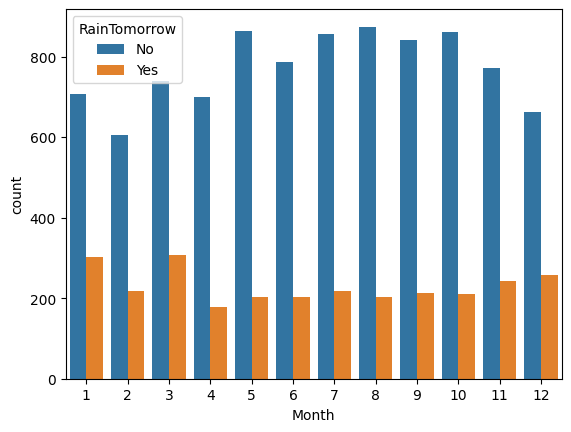

In [106]:
sns.countplot(x="Month", data=fishing_df, hue="RainTomorrow")

It seems the wettest months are in January and March.